# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

Your team wants to develop a dashboard to present daily visualizations of COVID-19 data collected from the [European Centre for Disease Prevention and Control.](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) Every day your team downloads the .xlsx file from the website, reads it, perform some transformations and produces several visualizations that are presented in the dashboard. 

Each row of the table contains the number of new cases and deaths reported per day and country. Every section below describes a specific task or visualization to perform.

# 4. Task #1: covid c mortalities cumulative analysis

## A. Replicate the two graphs we created in Section 2 and 3 for the column ’Deaths’. Pick N = 20 countries and start Day 0 at K = 10 deaths.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from scipy import stats
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
cumalative_covid = pd.read_excel('Covid_A_Master_Cumalative_Table.xlsx')
cumalative_covid.drop(columns = ['Unnamed: 0'], inplace = True)
cumalative_covid

,Cases,Deaths,Date,Country,Population,Continent
0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...
38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


In [3]:
last_day_per_year = cumalative_covid.groupby(by = ['Country'])['Date'].max()
last_day_per_year = last_day_per_year.to_frame()
last_day_per_year.reset_index()

,Country,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


In [4]:
last_day = pd.merge(cumalative_covid, last_day_per_year, how = 'inner', 
                    left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
last_day = last_day.sort_values(by = 'Deaths', ascending = False)
last_day = last_day.reset_index()

In [5]:
N = 20
top_countries = last_day[:N]['Country'].to_list()
# top_countries

In [6]:
K = 10
top_countries_deaths = cumalative_covid[cumalative_covid.Country.isin(top_countries)]
top_countries_deaths = top_countries_deaths[top_countries_deaths['Deaths'] > K]
# top_countries_deaths

In [7]:
day_0_for_every_country = top_countries_deaths.groupby(by = ['Country']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country.to_frame()

,Date
Country,
Argentina,2020-03-27
Belgium,2020-03-15
Brazil,2020-03-21
Canada,2020-03-21
Chile,2020-04-01
Colombia,2020-03-31
France,2020-03-09
Germany,2020-03-16
India,2020-03-26


In [8]:
top_countries_deaths = top_countries_deaths.merge(day_0_for_every_country, how = 'inner', on = 'Country')
top_countries_deaths = top_countries_deaths.rename(columns = {'Date_y': 'Date_0'})
# top_countries_deaths

In [9]:
top_countries_deaths['Days from 0'] = (top_countries_deaths['Date_x'] - top_countries_deaths['Date_0']).dt.days
top_countries_deaths

,Cases,Deaths,Date_x,Country,Population,Continent,Date_0,Days from 0
0,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...
3230,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


In [10]:
max_cases = top_countries_deaths.groupby(by = 'Country').max()
max_cases['Case fatality rate'] = (max_cases['Deaths'] / max_cases['Cases']) * 100
max_cases['Infection rate per million'] = (max_cases['Cases'] / max_cases['Population']) * 1000000
max_cases['Mortality rate per million'] = (max_cases['Deaths'] / max_cases['Population']) * 1000000
max_cases = max_cases.sort_values('Cases', ascending = False)
max_cases

,Cases,Deaths,Date_x,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
Country,,,,,,,,,,
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175,3.086874,17692.180780,546.135400
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,3.165458,17612.719601,557.523185
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,1.826819,2422.563660,44.255865
Russia,970865,16683,2020-08-27,1.458723e+08,Europe,2020-04-01,148,1.718365,6655.583454,114.367187
S.Africa,615701,13502,2020-08-27,5.855827e+07,Africa,2020-04-06,143,2.192948,10514.330965,230.573763
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152,4.585101,18867.095768,865.075372
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152,10.816745,4498.417561,486.582344
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,3.177521,11368.222727,361.227676
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169,6.900338,8944.936048,617.230819


In [11]:
x1 = np.array([0,15])
x2 = np.array([0,30])
x3 = np.array([0,45])
x7 = np.array([0,105])

y_1 = np.array([K, K*2**(x1[1]/1)])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

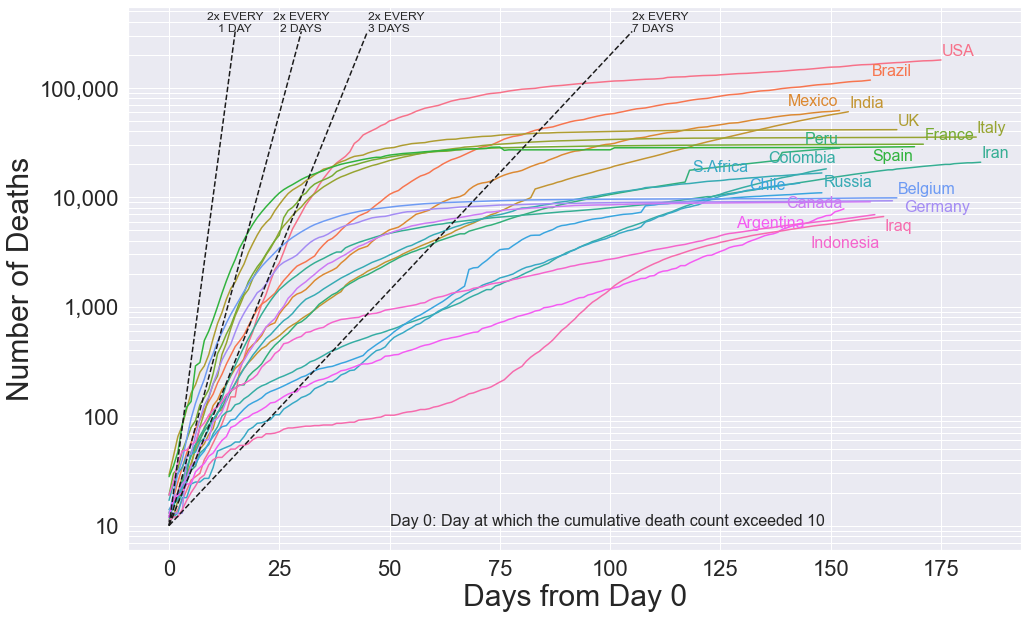

In [12]:
sns.set(rc={'figure.figsize':(16,10)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days from 0", y="Deaths", hue="Country", data=top_countries_deaths, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=30)
ax.set_ylabel("Number of Deaths",fontsize=30)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])
plt.text(50, 10, 'Day 0: Day at which the cumulative death count exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=12)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=12)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=12)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=12)
texts = [plt.text(max_cases.loc[str(country)]['Days from 0'], max_cases.loc[str(country)]['Deaths'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Task_1_Fig_1.1_Patel_Abhishek.png')

In [13]:
Average_infection_rate_per_1m = max_cases['Cases'].sum() / max_cases['Population'].sum() * 1000000
print("The average infection rate is: {:.1f} per 1m people".format(Average_infection_rate_per_1m))

Average_death_rate_per_1m = max_cases['Deaths'].sum() / max_cases['Population'].sum()* 1000000
print("The average death rate is: {:.1f} per 1m people".format(Average_death_rate_per_1m))

Average_mortality_per_cent_infected = max_cases['Deaths'].sum() / max_cases['Cases'].sum()*100
print("The average mortality rate is: {:.1f} per 100 people infected".format(Average_mortality_per_cent_infected))

The average infection rate is: 6163.3 per 1m people
The average death rate is: 226.8 per 1m people
The average mortality rate is: 3.7 per 100 people infected


## 3. Plot the daily cases moving averages

Plotting the daily cases is straight-forward. In most dashboards, they are plotted as bar
graphs. However, it is common with time-series data that fluctuations or noise obscures the
long-term trends or cycles. **Moving average** is a commonly used method that smooths
out short-term fluctuations and we will use this technique to plot the data in the dataframe
’covid top countries’ we already built with the cumulative cases.


Since we have the cumulative cases in the last df, we will calculate the moving slope
of the last 7 days **(back calc = 7) using the stats.linregress**, a statistical function from the
**SciPy** package.

In [14]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 7
slope_df = pd.DataFrame(columns=['Country', 'Days from 0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = top_countries_deaths[top_countries_deaths['Country'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days from 0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Deaths'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Country', 'Days from 0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    
slope_df.head(15)

,Country,Days from 0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
5,USA,5,NaN,NaN,NaN
6,USA,6,3.011905,0.974751,0.000005
7,USA,7,3.738095,0.958956,0.000022
8,USA,8,4.464286,0.952415,0.000034
9,USA,9,5.404762,0.941221,0.000065


In [15]:
slope_df.set_index('Country', drop = False, inplace = True)
# slope_df.to_excel('Covid_B_Slope_Daily.xlsx')

In [16]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Country']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Country'] = max_slope.index
# max_slope.index.name = None

# max_slope
# slope_df

In [17]:
data_1_5 = slope_df[slope_df.Country.isin(max_slope[:5]['Country'].tolist())]
data_1_5.reset_index(inplace = True)
data_1_5 = data_1_5.drop(columns = 'index')
Country_1_5 = max_slope[:5]['Country'].tolist()

data_6_10 = slope_df[slope_df.Country.isin(max_slope[5:10]['Country'].tolist())]
data_6_10.reset_index(inplace = True)
data_6_10 = data_6_10.drop(columns = 'index')
Country_6_10 = max_slope[5:10]['Country'].tolist()

data_11_15 = slope_df[slope_df.Country.isin(max_slope[10:15]['Country'].tolist())]
data_11_15.reset_index(inplace = True)
data_11_15 = data_11_15.drop(columns = 'index')
Country_11_15 = max_slope[10:15]['Country'].tolist()

data_16_20 = slope_df[slope_df.Country.isin(max_slope[15:20]['Country'].tolist())]
data_16_20.reset_index(inplace = True)
data_16_20 = data_16_20.drop(columns = 'index')
Country_16_20 = max_slope[15:20]['Country'].tolist()

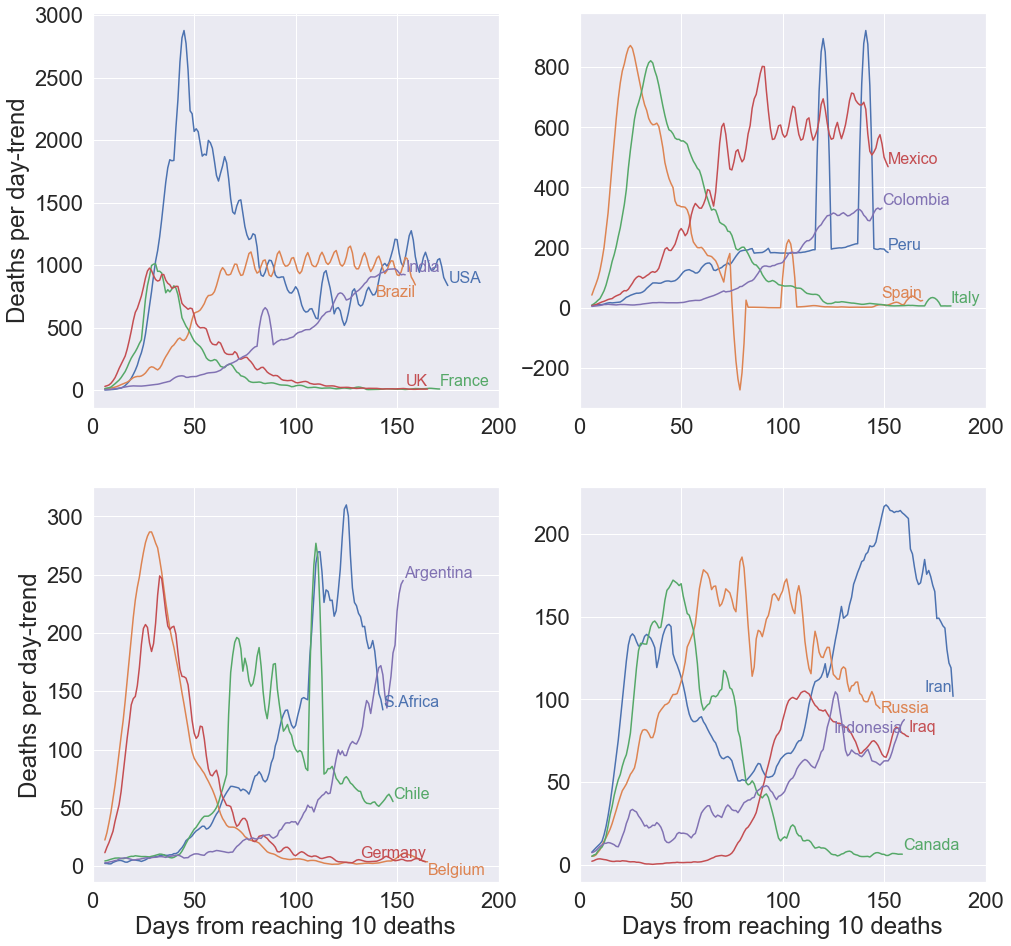

In [18]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_1_5, markers=True, hue_order=Country_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[Country_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Deaths per day-trend",fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_6_10, markers=True, hue_order=Country_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[Country_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in Country_6_10]
adjust_text(texts)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_11_15, markers=True, hue_order=Country_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[Country_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Deaths per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching {:.0f} deaths".format(K),fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_16_20, markers=True, hue_order=Country_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[Country_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching {:.0f} deaths".format(K),fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Task_1_Fig_1.2_Patel_Abhishek.png')

## B. A term that people started studying after the first few months of the pandemic is that of excess deaths. Excess deaths are the additional deaths to the typical death rate that are due to Covid-19. E.g. if the typical death rate for a country is 1000 deaths/day, and the Covid-19 deaths for a day is 500, then the excess death rate is 50%. You should see 1500 deaths/day in that country if the Covid-related deaths are independent of the expected deaths (this is not the case).

## To calculate the excess deaths, you need an estimate of the typical death rate per country. Use the table ’Death rate crude per 1000 people.xls’ with the code below to import and make some changes in the dataframe (the data set is downloaded from the [(World Bank Data).](https://data.worldbank.org/indicator/SP.DYN.CDRT.IN)

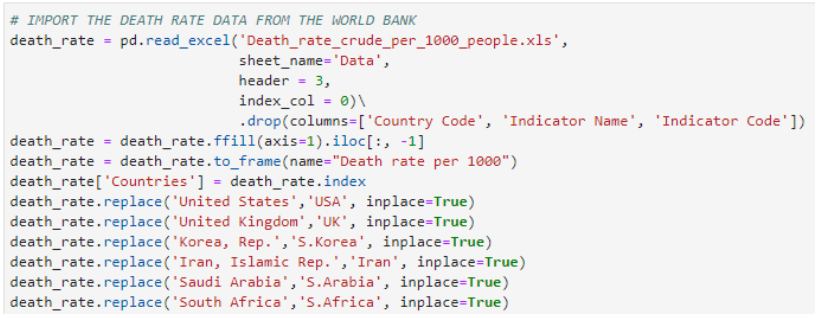

In [19]:
crude_death_rate = pd.read_excel('Death_rate_crude_per_1000_people.xls',
                                 sheet_name = 'Data',
                                 header = 3,
                                 index_col = 0).drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
crude_death_rate = crude_death_rate.ffill(axis = 1).iloc[:, -1]
crude_death_rate = crude_death_rate.to_frame(name = "Death rate per 1000")
crude_death_rate['Country'] = crude_death_rate.index
crude_death_rate.replace({'United States': 'USA', 'United Kingdom': 'UK', 'Korea, Rep.': 'S.Korea',
                    'Iran, Islamic Rep.': 'Iran', 'Saudi Arabia': 'S.Arabia', 'South Africa': 'S.Africa',
                    'Yemen, Rep.': 'Yemen'},
                    inplace = True)

crude_death_rate

,Death rate per 1000,Country
Country Name,,
Aruba,8.907,Aruba
Afghanistan,6.575,Afghanistan
Angola,8.432,Angola
Albania,7.714,Albania
Andorra,4.300,Andorra
...,...,...
Kosovo,7.000,Kosovo
"Yemen, Rep.",5.978,Yemen
South Africa,9.498,S.Africa


#### You have to left join the dataframe ’death rate’ with the dataframe ’covid top countries’ on ’Countries’ to make sure that your main table has the information you need. 

#### The crude death rate reported in the World Bank Data is an annual average per 1000 people. Therefore, in order to convert it to daily typical deaths you need to do:

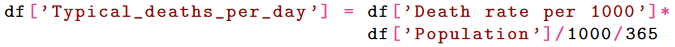

#### Then, you can calculate the typical cumulative deaths and the excess deaths rate as the ratio of the cumulative deaths over the typical cumulative deaths expressed as %, with the help of the following code:

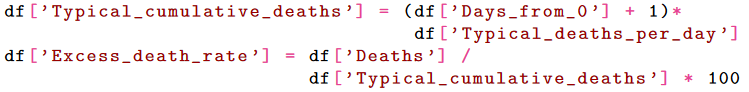

In [20]:
actual_death_rate = crude_death_rate.merge(top_countries_deaths,
                                           how = 'left',
                                           on = 'Country')

actual_death_rate['Typical_deaths_per_day'] = (actual_death_rate['Death rate per 1000'] * 
                                               actual_death_rate['Population']) / (1000 * 365)

actual_death_rate['Typical_cumalative_deaths'] = (actual_death_rate['Days from 0'] + 1) * (actual_death_rate['Typical_deaths_per_day'])
    
actual_death_rate['Excess_death_rate'] = (actual_death_rate['Deaths'] / actual_death_rate['Typical_cumalative_deaths']) * 100

actual_death_rate

,Death rate per 1000,Country,Cases,Deaths,Date_x,Population,Continent,Date_0,Days from 0,Typical_deaths_per_day,Typical_cumalative_deaths,Excess_death_rate
0,8.907,Aruba,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,6.575,Afghanistan,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,8.432,Angola,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,7.714,Albania,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,4.300,Andorra,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3474,9.498,S.Africa,611450.0,13159.0,2020-08-25,58558267.0,Africa,2020-04-06,141.0,1523.798411,216379.374343,6.081448
3475,9.498,S.Africa,613017.0,13308.0,2020-08-26,58558267.0,Africa,2020-04-06,142.0,1523.798411,217903.172754,6.107300
3476,9.498,S.Africa,615701.0,13502.0,2020-08-27,58558267.0,Africa,2020-04-06,143.0,1523.798411,219426.971165,6.153300
3477,6.633,Zambia,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [21]:
# actual_death_rate = actual_death_rate.groupby(by = 'Country').max()
# actual_death_rate

# actual_death_rate.set_index('Country', inplace = True)

# actual_death_rate = actual_death_rate[['Country', 'Death rate per 1000', 'Cases', 'Deaths', 'Date_x', 
#                                        'Population', 'Continent', 'Date_0', 'Days from 0', 'Typical_deaths_per_day', 
#                                        'Typical_cumalative_deaths', 'Excess_death_rate']]
# adr = actual_death_rate['Country'].to_list()

# actual_death_rate = actual_death_rate.drop(['Death rate per 1000'], axis = 1)
# actual_death_rate

#### The final output and what is asked in this part should look similar to the graph below.

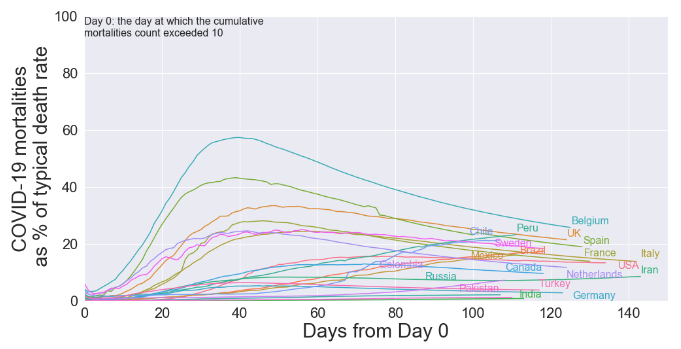

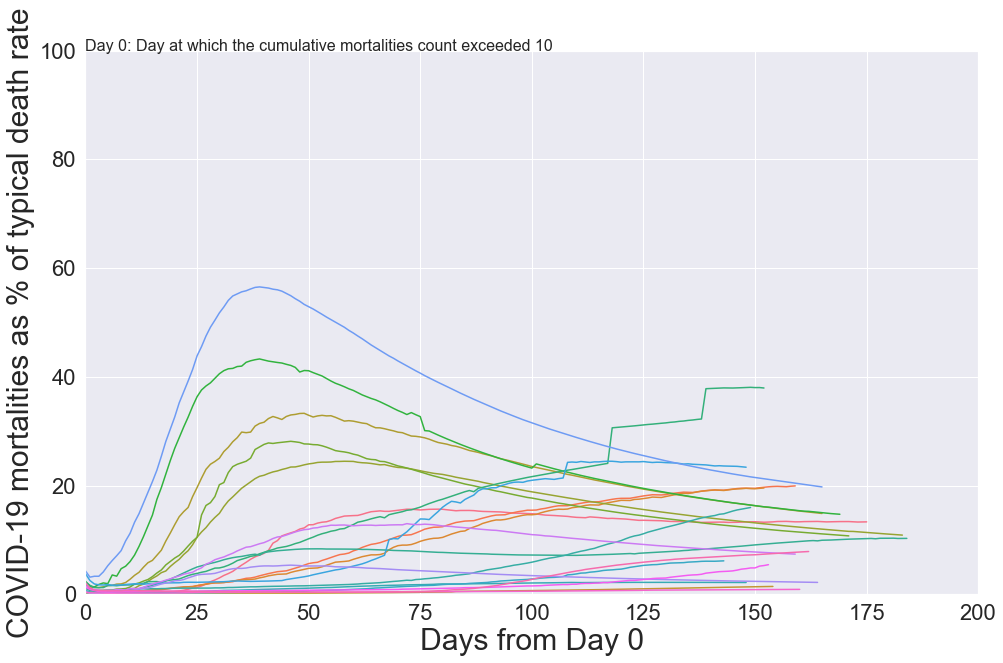

In [22]:
sns.set(rc={'figure.figsize':(16,10)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days from 0", y="Excess_death_rate", hue="Country", data=actual_death_rate, markers=True, hue_order=top_countries, legend=False)
# ax.set_yscale('log')
plt.grid(True, which='both')
# ax.plot(x1, y_1, 'k--')
# ax.plot(x2, y_2, 'k--')
# ax.plot(x3, y_3, 'k--')
# ax.plot(x7, y_7, 'k--')

ax.set_xlabel("Days from Day 0",fontsize=30)
ax.set_ylabel("COVID-19 mortalities as % of typical death rate",fontsize=30)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim([0,100])
plt.xlim([0, 200])
plt.text(0, 100, 'Day 0: Day at which the cumulative mortalities count exceeded {:.0f}'.format(K), fontsize=16)

# plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=12)
# plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=12)
# plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=12)
# plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=12)

# texts = [plt.text(actual_death_rate.loc[str(country)]['Days from 0'], actual_death_rate.loc[str(country)]['Deaths'], 
#                   str(country), fontsize=16,
#                   color=ax.get_lines()[actual_death_rate.index(country)].get_c(), 
#                   ha = 'center', va = 'center') for country in actual_death_rate]
# adjust_text(texts)

plt.savefig('Task_1_Fig_1.3_Patel_Abhishek.png')